In [102]:
import pandas as pd
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
users = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\user_profile_table.csv")
data_balance = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\user_balance_table.csv")
share = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\mfd_day_share_interest.csv")
bank = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\mfd_bank_shibor.csv")

In [104]:
users.head(5)
##users.describe()

,user_id,sex,city,constellation
0,2,1,6411949,狮子座
1,12,1,6412149,摩羯座
2,22,1,6411949,双子座
3,23,1,6411949,双鱼座
4,25,1,6481949,双鱼座


(array([13552.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14489.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

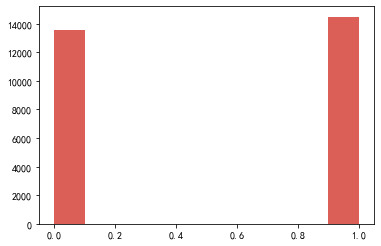

In [105]:
plt.hist(users['sex'])

(array([4003.,    0.,    0., 9550.,    0., 9594., 2929., 1965.]),
 array([6081949., 6144449., 6206949., 6269449., 6331949., 6394449.,
        6456949., 6519449., 6581949.]),
 <a list of 8 Patch objects>)

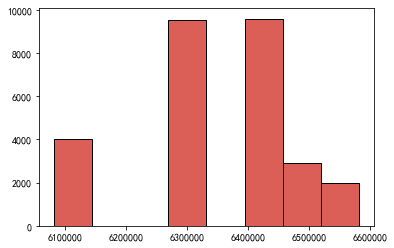

In [106]:
plt.hist(users['city'],bins=8,edgecolor = 'black')

(array([4667., 2088., 2265., 2910., 2336., 2640., 2336., 2108., 1992.,
        4699.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

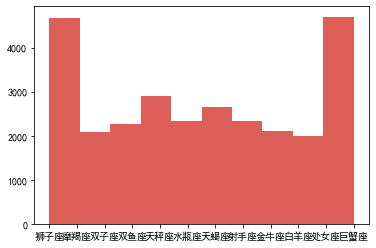

In [107]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.hist(users['constellation'])

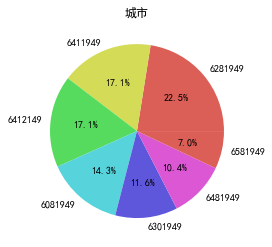

In [108]:
city = users.loc[:,"city"].value_counts()
city=city.to_frame()
#绘制饼形图
def drawPie(grades):
    labels = city.index
    labels.tolist()
    gradeGroup = {}
    for grade in users.loc[:,"city"]:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    plt.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    plt.title('城市')
    plt.show()

drawPie(users.loc[:,"city"])

In [109]:
users

,user_id,sex,city,constellation
0,2,1,6411949,狮子座
1,12,1,6412149,摩羯座
2,22,1,6411949,双子座
3,23,1,6411949,双鱼座
4,25,1,6481949,双鱼座
...,...,...,...,...
28036,28017,0,6412149,摩羯座
28037,28018,0,6411949,摩羯座
28038,28022,1,6081949,双鱼座
28039,28034,1,6301949,天蝎座


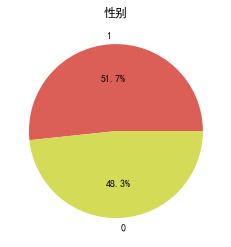

In [110]:
sex = users.loc[:,"sex"].value_counts()
sex=sex.to_frame()
#绘制饼形图
def drawPie(grades):
    labels = sex.index
    labels.tolist()
    gradeGroup = {}
    for grade in users.loc[:,"sex"]:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    plt.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    plt.title('性别')
    plt.show()

drawPie(users.loc[:,"sex"])

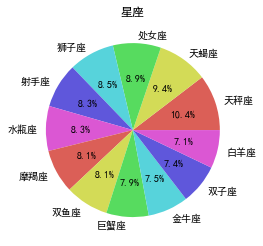

In [111]:
xingzuo = users.loc[:,"constellation"].value_counts()
xingzuo=xingzuo.to_frame()
#绘制饼形图
def drawPie(grades):
    labels = xingzuo.index
    labels.tolist()
    gradeGroup = {}
    for grade in users.loc[:,"constellation"]:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    plt.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    plt.title('星座')
    plt.show()

drawPie(users.loc[:,"constellation"])

In [112]:
# add tiemstamp to dataset
data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday

# total amount
total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance.reset_index(inplace=True)

# Add time stamp
total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday


In [113]:
# 获得大额用户的集合

temp = data_balance[(data_balance['total_purchase_amt'] >= 1000000) | (data_balance['total_redeem_amt'] >= 1000000)]
big_users_set = set(temp[temp['date'] >= datetime.datetime(2014,4,1)]['user_id'])
len(big_users_set)



3903

In [114]:
# 标记大额用户

data_balance['big_user'] = 0
data_balance.loc[data_balance['user_id'].isin(big_users_set), 'big_user'] = 1

In [115]:

# 统计大额用户与小额用户的日总交易额的区别

total_balance_bigNsmall = data_balance.groupby(['date','big_user'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

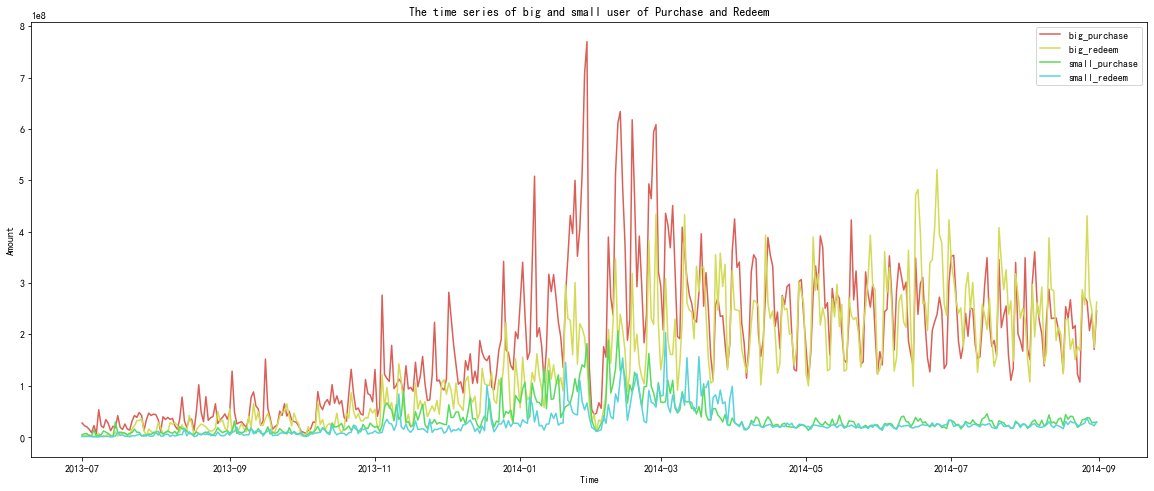

In [116]:

# 画出大额用户与小额用户交易的日总交易量图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_purchase_amt'],label='big_purchase')
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_redeem_amt'],label='big_redeem')

plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_purchase_amt'],label='small_purchase')
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [117]:
# 统计大额小额用户购买量占比

np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_purchase_amt']) / np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_purchase_amt'])

5.1456178397775805

In [118]:
# 统计大额小额用户赎回量占比

np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_redeem_amt']) / np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_redeem_amt'])

5.422141272341089

## 分析用户的交易频次

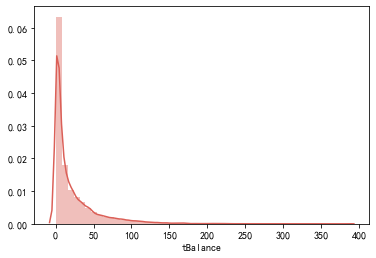

In [119]:

# 画出非0交易的分布图

frequency = data_balance[(data_balance['direct_purchase_amt'] != 0) | (data_balance['total_redeem_amt'] != 0)][['user_id','tBalance']].groupby('user_id', as_index=False).count()
sns.distplot(frequency['tBalance'])

In [120]:
# 获取频繁交易用户集合

hot_users_set = set(frequency[frequency['tBalance'] > 30]['user_id'])

In [121]:
# 获取频繁用户的交易纪录

data_balance['is_hot_users'] = 0
data_balance.loc[data_balance['user_id'].isin(hot_users_set) , 'is_hot_users'] = 1

In [122]:
# 统计频繁用户与非频繁用户的日总交易额的区别

total_balance_hotNcold = data_balance.groupby(['date','is_hot_users'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

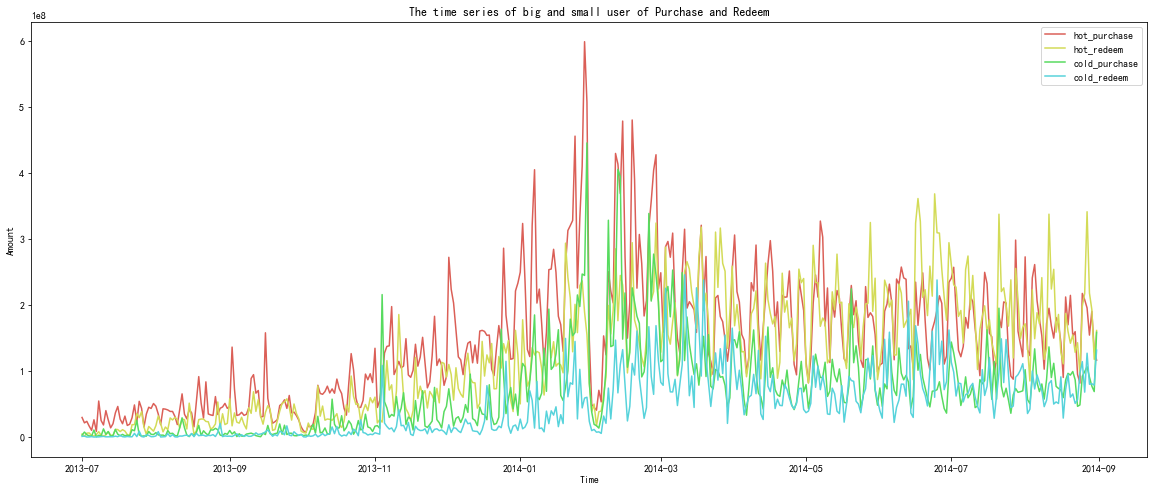

In [123]:

# 绘制频繁用户与非频繁用户总购买赎回量的时序图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['total_purchase_amt'],label='hot_purchase')
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['total_redeem_amt'],label='hot_redeem')

plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['total_purchase_amt'],label='cold_purchase')
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['total_redeem_amt'],label='cold_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [124]:
# 添加城市、星座、性别

data_balance = pd.merge(data_balance, users, on='user_id')

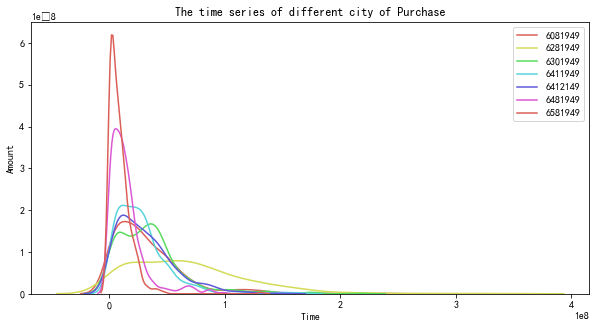

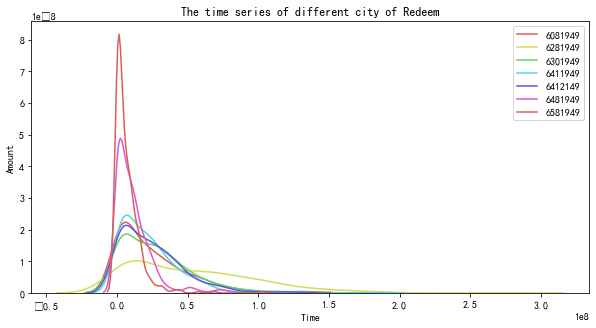

In [125]:
# 统计每个城市用户的日总交易额的区别并绘制分布估计图

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of different city of Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of different city of Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

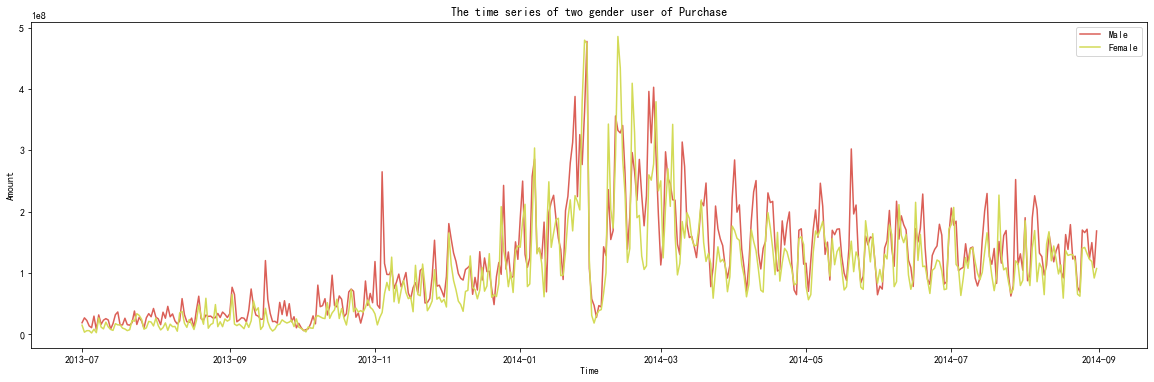

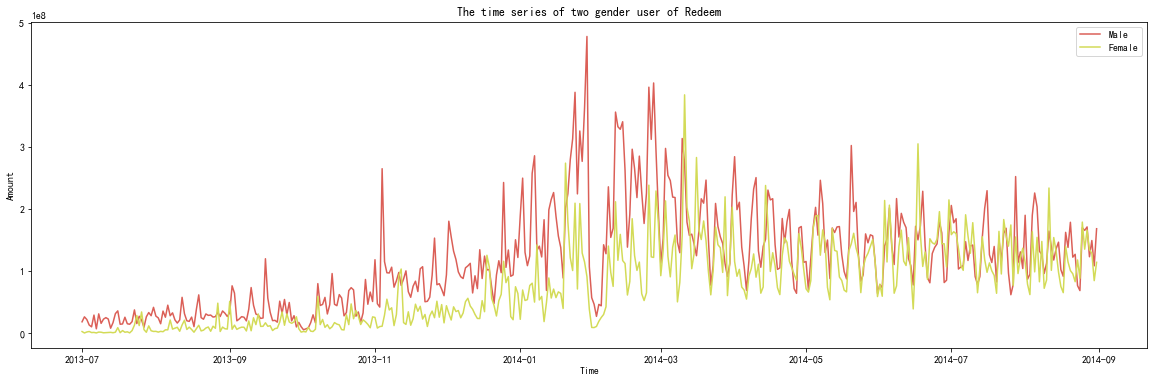

In [126]:

# 统计每个性别用户的日总交易额的区别，并绘制时序图

temp = data_balance.groupby(['date','sex'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

fig = plt.figure(figsize=(20,6))
plt.plot(temp[temp['sex'] == 1]['date'], temp[temp['sex'] == 1]['total_purchase_amt'],label='Male')
plt.plot(temp[temp['sex'] == 0]['date'], temp[temp['sex'] == 0]['total_purchase_amt'],label='Female')
plt.legend(loc='best')
plt.title("The time series of two gender user of Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(20,6))
plt.plot(temp[temp['sex'] == 1]['date'], temp[temp['sex'] == 1]['total_purchase_amt'],label='Male')
plt.plot(temp[temp['sex'] == 0]['date'], temp[temp['sex'] == 0]['total_redeem_amt'],label='Female')
plt.legend(loc='best')
plt.title("The time series of two gender user of Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [127]:
# 加载支付宝利率数据

share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

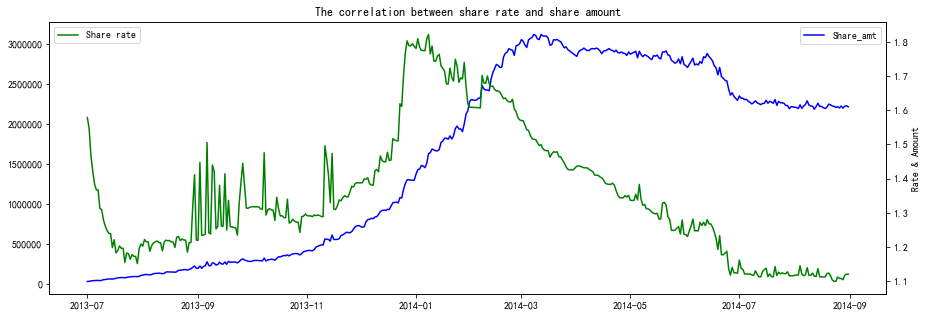

In [128]:
# 绘制支付宝利率与交易额的时序图
temp = data_balance.groupby(['date'], as_index=False)['direct_purchase_amt','share_amt'].sum()

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'],'b',label="Share_amt")
plt.legend()

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Share rate")

plt.legend(loc=2)
plt.title("The correlation between share rate and share amount")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

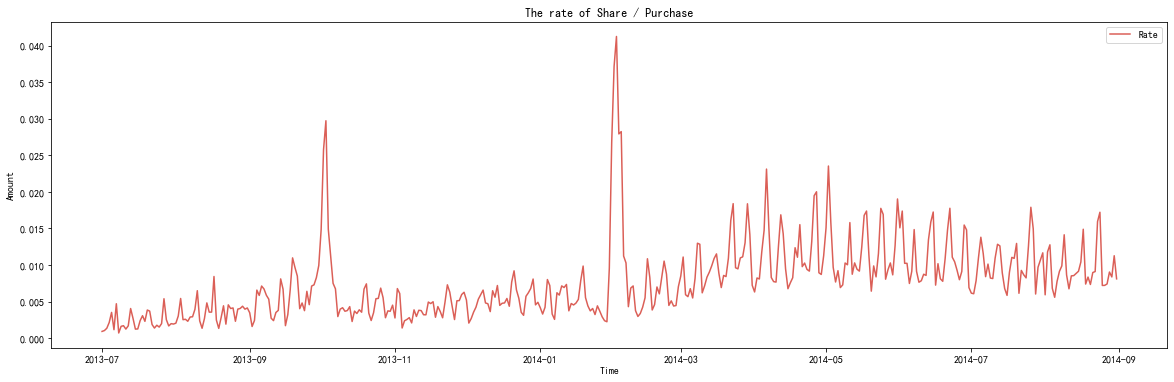

In [129]:
# 画出每日利息的增长/直接购买量的时序图

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'],  temp['share_amt'] / temp['direct_purchase_amt'] ,label='Rate')
plt.legend(loc='best')
plt.title("The rate of Share / Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

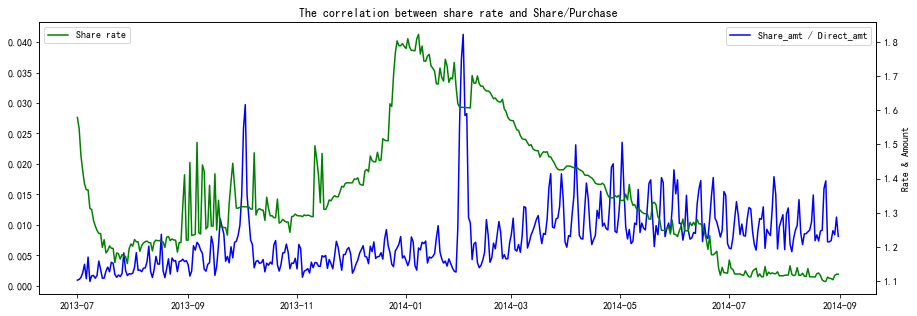

In [130]:
# 支付宝利率与每日利息的增长/直接购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'] / temp['direct_purchase_amt'],'b',label="Share_amt / Direct_amt")
plt.legend()

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Share rate")

plt.legend(loc=2)
plt.title("The correlation between share rate and Share/Purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

In [131]:
# 聚合两种不同购买方式

temp = data_balance.groupby(['date'], as_index=False)['purchase_bal_amt','purchase_bank_amt'].sum()

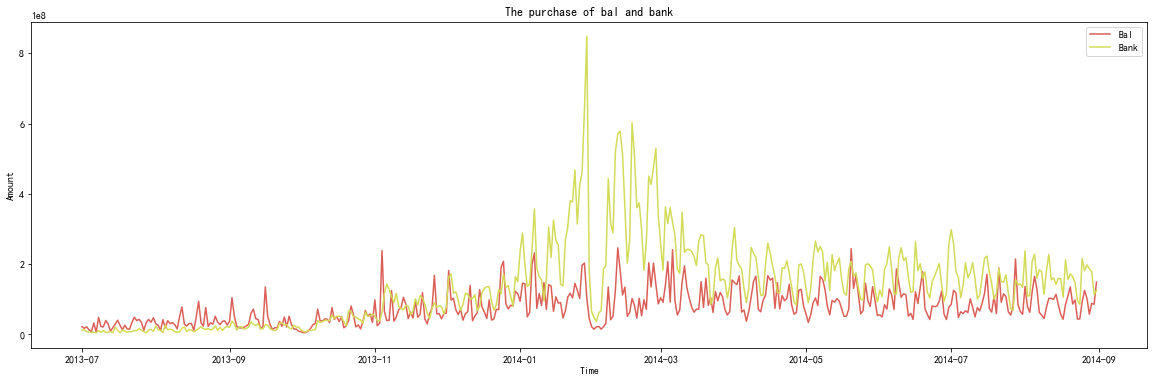

In [132]:
# 画出不同购买方式日购买量的时序图

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['purchase_bal_amt'],label='Bal')
plt.plot(temp['date'], temp['purchase_bank_amt'],label='Bank')
plt.legend(loc='best')
plt.title("The purchase of bal and bank")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

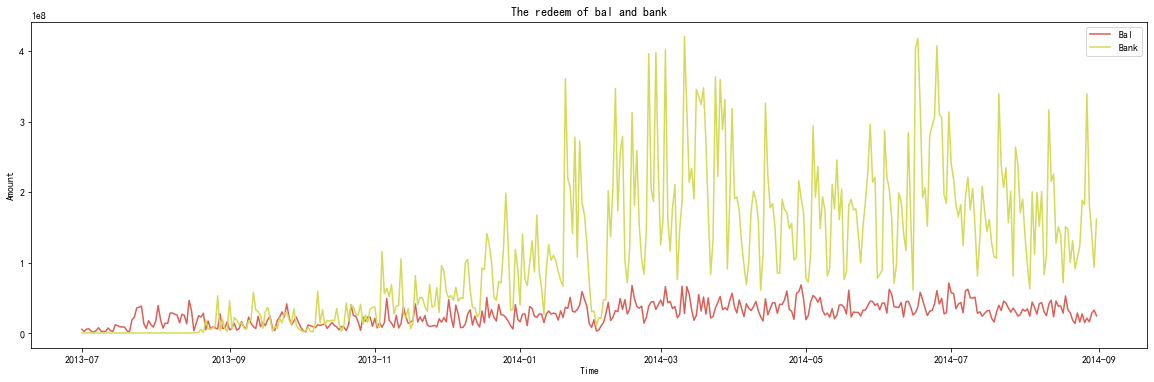

In [133]:
# 画出不同赎回方式日赎回量的时序图

temp = data_balance.groupby(['date'], as_index=False)['tftobal_amt','tftocard_amt'].sum()
fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['tftobal_amt'],label='Bal')
plt.plot(temp['date'], temp['tftocard_amt'],label='Bank')
plt.legend(loc='best')
plt.title("The redeem of bal and bank")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()


# data_balance 数组探索性分析

In [134]:
data_balance = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\user_balance_table.csv")
##变量中0的个数
for index in data_balance:
    print((data_balance[index]==0).sum())


0
0
52719
64742
900058
2671936
2757995
2746220
2602270
2666682
2764875
2812858
2790467
943768
154344
154026
173350
32622


In [135]:

# add tiemstamp to dataset
data_balance['date'] = pd.to_datetime(data_balance['report_date'], format="%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday


In [136]:

import warnings
warnings.filterwarnings('ignore')
# 聚合时间数据,计算每天的申购量和赎回量
total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()


In [137]:
total_balance.columns

Index(['date', 'total_purchase_amt', 'total_redeem_amt'], dtype='object')

In [138]:
# 生成测试集区段数据

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

In [139]:
# 拼接数据集

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [140]:
# 为数据集添加时间戳

total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

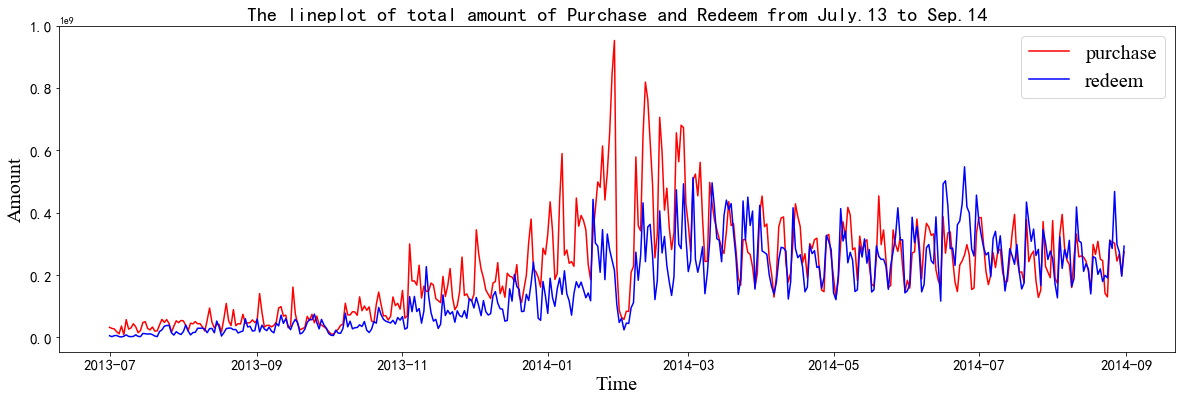

In [141]:

# 画出每日总购买与赎回量的时间序列图

fig = plt.figure(figsize=(20,6))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase',color="r")
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem',color="b")
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}
plt.legend(loc='best',prop=font1)
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14",fontsize=20)

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}

#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

plt.xlabel("Time",font1)
plt.ylabel("Amount",font1)
plt.show()

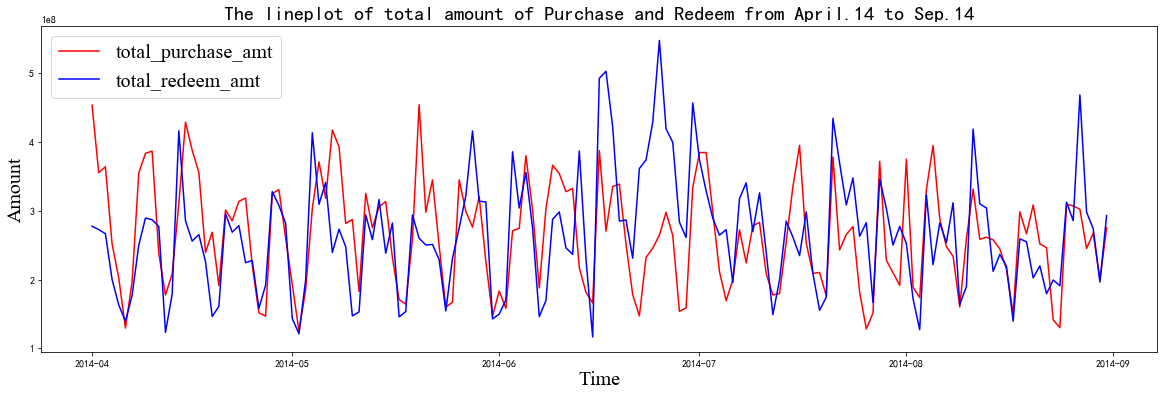

In [142]:
#四月份后购买与赎回趋于稳定
# 画出4月份以后的时间序列图

total_balance_1 = total_balance[total_balance['date'] >= datetime.datetime(2014,4,1,0,0,0)]
fig = plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'],color="r",label="total_purchase_amt")
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'],color="b",label="total_redeem_amt")


plt.legend(loc='best',prop=font1)
plt.title("The lineplot of total amount of Purchase and Redeem from April.14 to Sep.14",fontsize=20)
plt.xlabel("Time",font1)
plt.ylabel("Amount",font1)
plt.show()

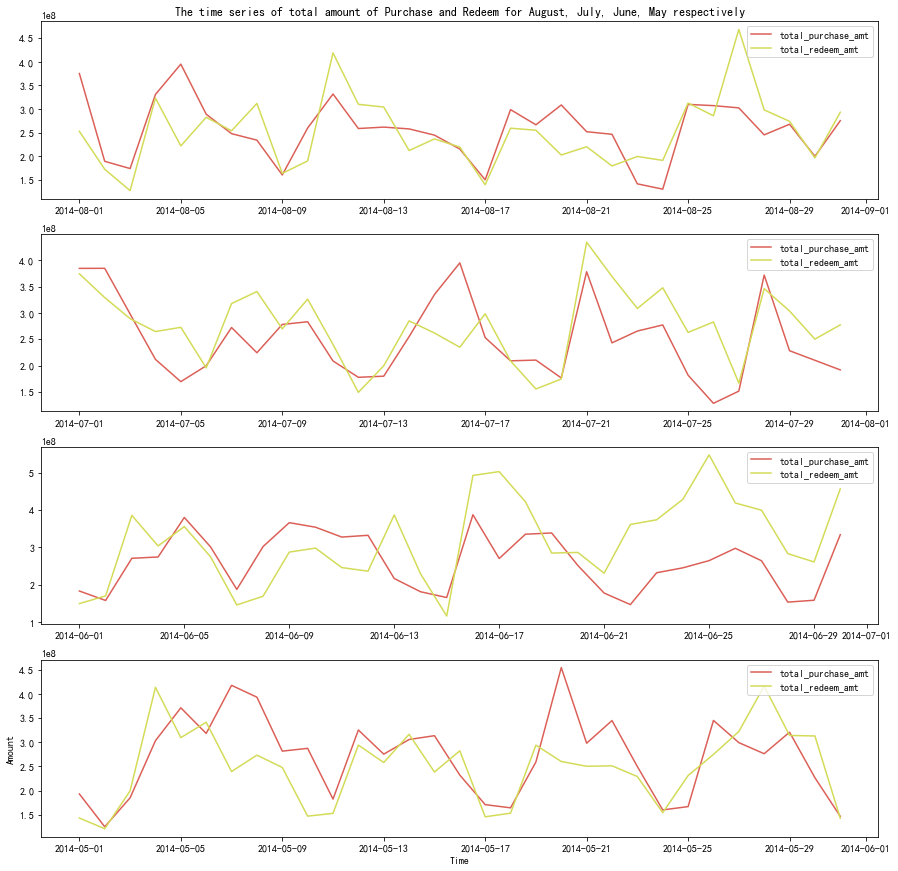

In [143]:
# 分别画出每个月中每天购买赎回量的时间序列图

fig = plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.title("The time series of total amount of Purchase and Redeem for August, July, June, May respectively")

total_balance_2 = total_balance[total_balance['date'] >= datetime.datetime(2014,8,1,0,0,0)]
plt.plot(total_balance_2['date'], total_balance_2['total_purchase_amt'],label="total_purchase_amt")
plt.plot(total_balance_2['date'], total_balance_2['total_redeem_amt'],label="total_redeem_amt")
plt.legend(loc="upper right")


total_balance_3 = total_balance[(total_balance['date'] >= datetime.datetime(2014,7,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,8,1,0,0,0))]
plt.subplot(4,1,2)
plt.plot(total_balance_3['date'], total_balance_3['total_purchase_amt'],label="total_purchase_amt")
plt.plot(total_balance_3['date'], total_balance_3['total_redeem_amt'],label="total_redeem_amt")
plt.legend(loc="upper right")


total_balance_4 = total_balance[(total_balance['date'] >= datetime.datetime(2014,6,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,7,1,0,0,0))]
plt.subplot(4,1,3)
plt.plot(total_balance_4['date'], total_balance_4['total_purchase_amt'],label="total_purchase_amt")
plt.plot(total_balance_4['date'], total_balance_4['total_redeem_amt'],label="total_redeem_amt")
plt.legend(loc="upper right")


total_balance_5 = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,6,1,0,0,0))]
plt.subplot(4,1,4)
plt.plot(total_balance_5['date'], total_balance_5['total_purchase_amt'],label="total_purchase_amt")
plt.plot(total_balance_5['date'], total_balance_5['total_redeem_amt'],label="total_redeem_amt")
plt.legend(loc="upper right")

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

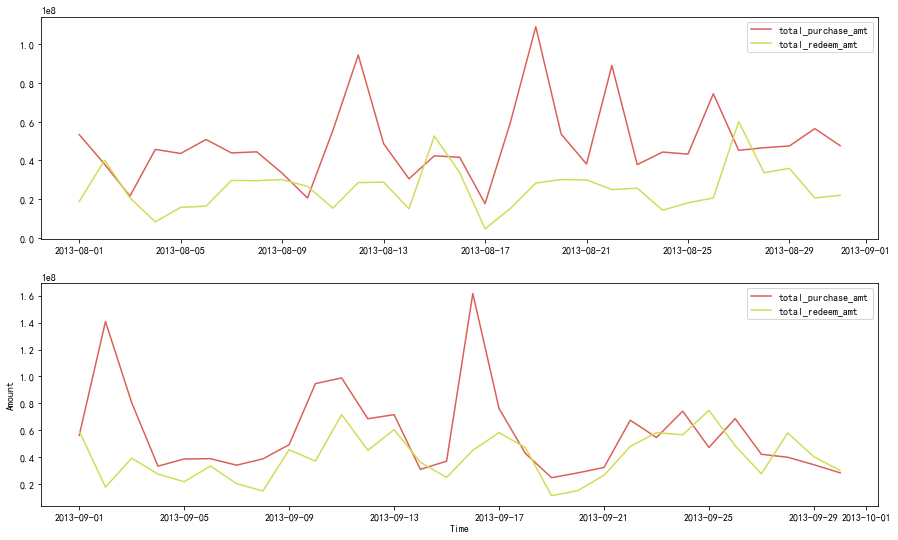

In [144]:
# 分别画出13年8月与9月每日购买赎回量的时序图

fig = plt.figure(figsize=(15,9))

total_balance_last8 = total_balance[(total_balance['date'] >= datetime.datetime(2013,8,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,9,1,0,0,0))]
plt.subplot(2,1,1)
plt.plot(total_balance_last8['date'], total_balance_last8['total_purchase_amt'],label="total_purchase_amt")
plt.plot(total_balance_last8['date'], total_balance_last8['total_redeem_amt'],label="total_redeem_amt")
plt.legend()

total_balance_last9 = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,10,1,0,0,0))]
plt.subplot(2,1,2)
plt.plot(total_balance_last9['date'], total_balance_last9['total_purchase_amt'],label="total_purchase_amt")
plt.plot(total_balance_last9['date'], total_balance_last9['total_redeem_amt'],label="total_redeem_amt")
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

### 结论：月末时赎回高于购买（月末时更需要钱）       申购与赎回看起来有关联           每月有4个波峰、4个波谷

## 分析周一到周日申购总量和赎回总量的差异（按照周数据进行探索）

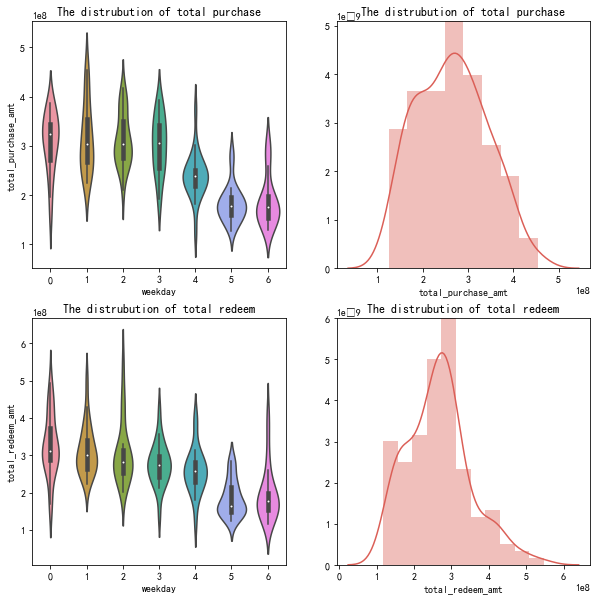

In [145]:
# 绘制小提琴图和分布图
# 与余额宝收益计算方式有关
# 画出每个翌日的数据分布于整体数据的分布图

a = plt.figure(figsize=(10,10))
scatter_para = {'marker':'.', 's':3, 'alpha':0.3}
line_kws = {'color':'k'}
plt.subplot(2,2,1)
plt.title('The distrubution of total purchase')
sns.violinplot(x='weekday', y='total_purchase_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,2)
plt.title('The distrubution of total purchase')
sns.distplot(total_balance_1['total_purchase_amt'].dropna())
plt.subplot(2,2,3)
plt.title('The distrubution of total redeem')
sns.violinplot(x='weekday', y='total_redeem_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,4)
plt.title('The distrubution of total redeem')
sns.distplot(total_balance_1['total_redeem_amt'].dropna())

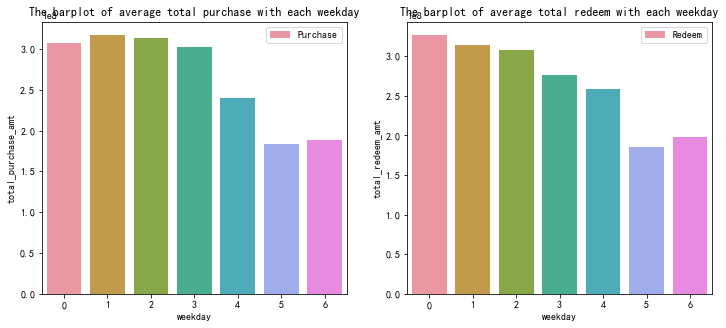

In [146]:
# 按翌日对数据聚合后取均值

week_sta = total_balance_1[['total_purchase_amt', 'total_redeem_amt', 'weekday']].groupby('weekday', as_index=False).mean()

# 分析翌日的中位数特征

plt.figure(figsize=(12, 5))
ax = plt.subplot(1,2,1)
plt.title('The barplot of average total purchase with each weekday')
ax = sns.barplot(x="weekday", y="total_purchase_amt", data=week_sta, label='Purchase')
ax.legend()
ax = plt.subplot(1,2,2)
plt.title('The barplot of average total redeem with each weekday')
ax = sns.barplot(x="weekday", y="total_redeem_amt", data=week_sta, label='Redeem')
ax.legend()

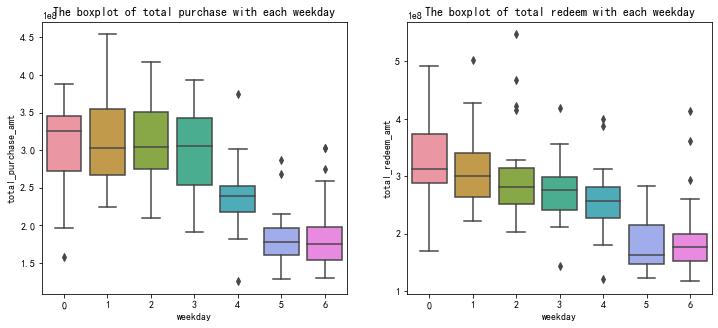

In [147]:
# 画出翌日的箱型图

plt.figure(figsize=(12, 5))
ax = plt.subplot(1,2,1)
plt.title('The boxplot of total purchase with each weekday')
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=total_balance_1)
ax = plt.subplot(1,2,2)
plt.title('The boxplot of total redeem with each weekday')
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=total_balance_1)

In [148]:
# 使用OneHot方法将翌日特征划分，获取划分后特征

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
total_balance = total_balance.reset_index()
week_feature = encoder.fit_transform(np.array(total_balance['weekday']).reshape(-1, 1)).toarray()
week_feature = pd.DataFrame(week_feature,columns=['weekday_onehot']*len(week_feature[0]))
feature = pd.concat([total_balance, week_feature], axis = 1)[['total_purchase_amt', 'total_redeem_amt','weekday_onehot','date']]
feature.columns = list(feature.columns[0:2]) + [x+str(i) for i,x in enumerate(feature.columns[2:-1])] + ['date']

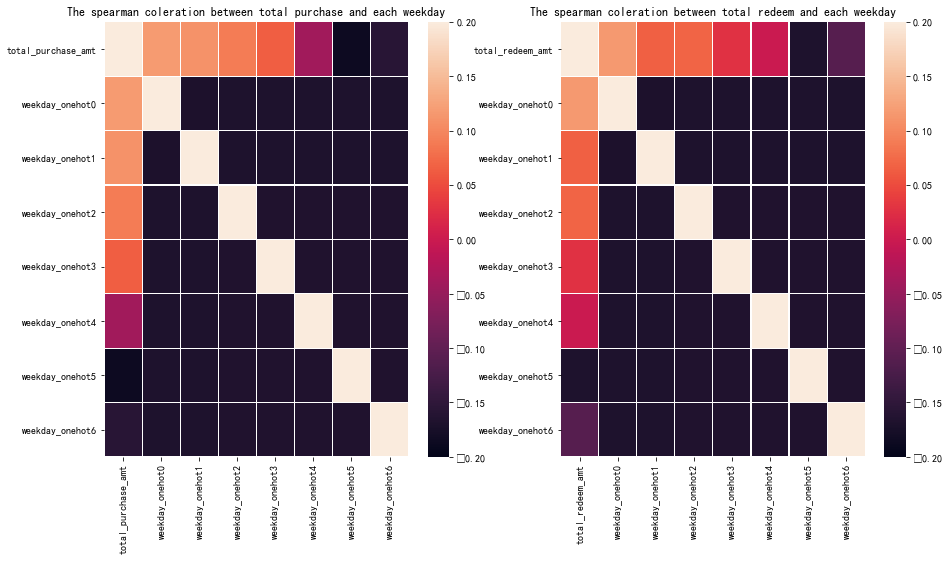

In [149]:
# 画出划分后翌日特征与标签的斯皮尔曼相关性

f, ax = plt.subplots(figsize = (15, 8))
plt.subplot(1,2,1)
plt.title('The spearman coleration between total purchase and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman'),linewidths = 0.1, vmax = 0.2, vmin=-0.2)
plt.subplot(1,2,2)
plt.title('The spearman coleration between total redeem and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman'),linewidths = 0.1,  vmax = 0.2, vmin=-0.2)


In [150]:
# 测试翌日特征与标签的独立性 Ref: https://github.com/ChuanyuXue/MVTest

from mvtpy.mvtest import mvtest
mv = mvtest()
mv.test(total_balance_1['total_purchase_amt'], total_balance_1['weekday'])

#两者不独立

{'Tn': 6.75, 'p-value': [0, 0.01]}

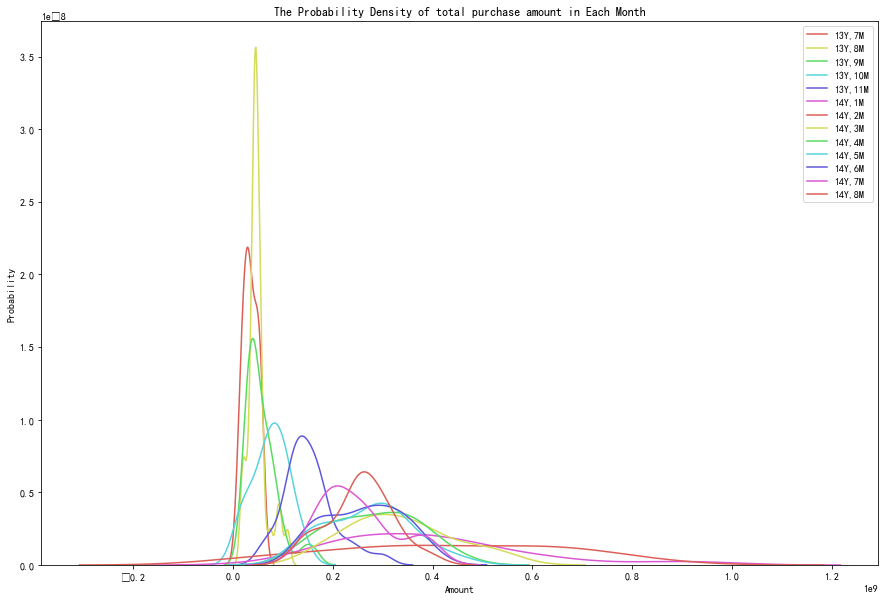

In [151]:
# 画出每个月的购买总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total purchase amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2013,i,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,i+1,1,0,0,0))]['total_purchase_amt'],label='13Y,'+str(i)+'M')
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2014,i,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,i+1,1,0,0,0))]['total_purchase_amt'],label='14Y,'+str(i)+'M')

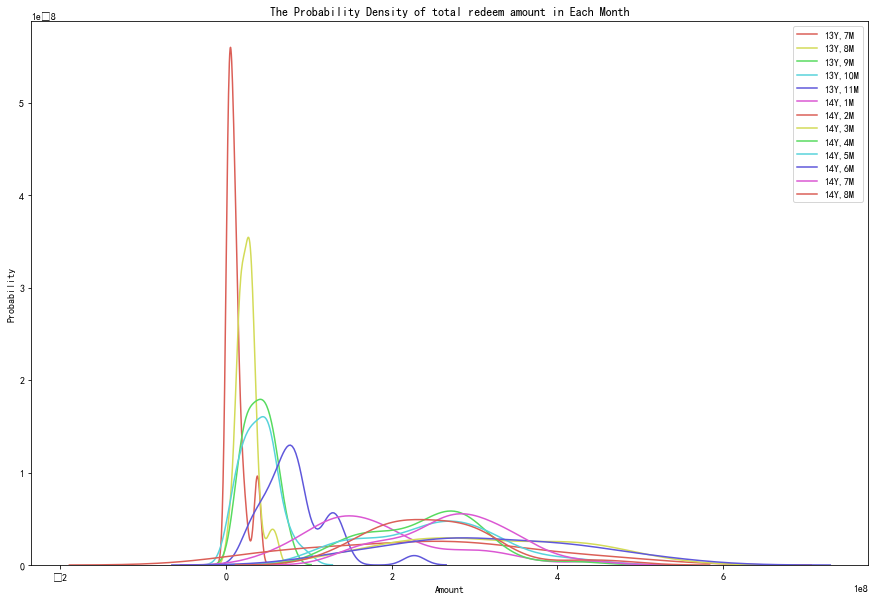

In [152]:
# 画出每个月的购买总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total redeem amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2013,i,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,i+1,1,0,0,0))]['total_redeem_amt'],label='13Y,'+str(i)+'M')
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'] >= datetime.datetime(2014,i,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,i+1,1,0,0,0))]['total_redeem_amt'],label='14Y,'+str(i)+'M')


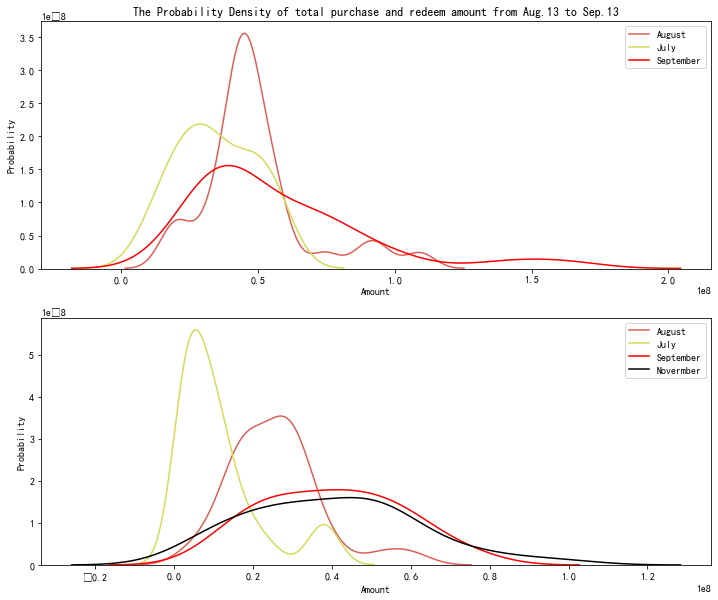

In [153]:

# 画出13年八月到九月份的分布估计图

total_balance_last_7 = total_balance[(total_balance['date'] >= datetime.datetime(2013,7,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,8,1,0,0,0))]
total_balance_last_8 = total_balance[(total_balance['date'] >= datetime.datetime(2013,8,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,9,1,0,0,0))]
total_balance_last_9 = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,10,1,0,0,0))]
total_balance_last_10 = total_balance[(total_balance['date'] >= datetime.datetime(2013,10,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,11,1,0,0,0))]
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from Aug.13 to Sep.13')
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_purchase_amt'],color='Red',label='September')

ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_redeem_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_redeem_amt'],color='Black',label='Novermber')

# 按照每日数据进行数据探索

### 一年只有7个31日，可能会产生问题？
计算均值应该没问题

In [154]:
# 按照每天聚合数据集
#所有用户一个月中每天的均值
day_sta = total_balance_2[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()

Text(0.5, 1.0, 'The total Redeem in Aug.14')

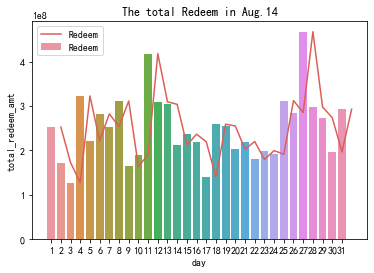

In [155]:

# 获取聚合后每月赎回分布的柱状图

ax = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax.legend()
plt.title("The total Redeem in Aug.14")

Text(0.5, 1.0, 'The total Purchase in Aug.14')

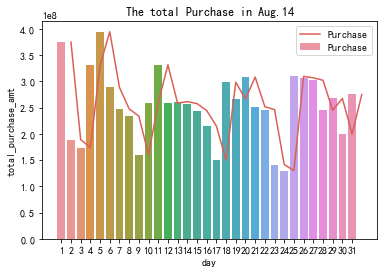

In [156]:
# 获取聚合后每月购买分布的柱状图

ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax.legend()
plt.title("The total Purchase in Aug.14")

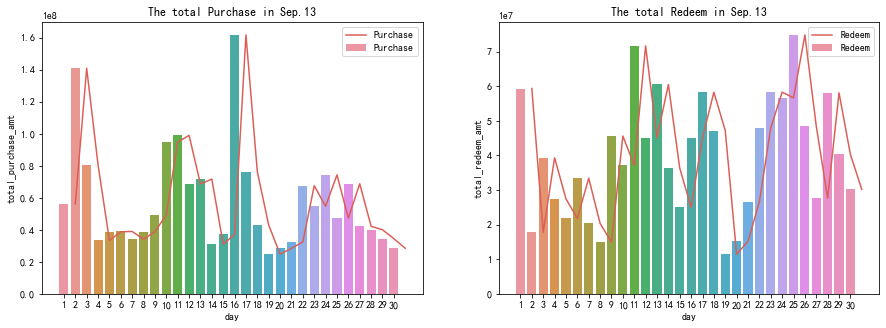

In [157]:
# 画出13年九月份的分布图

plt.figure(figsize=(15,5))
day_sta = total_balance_last_9[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()
plt.subplot(1,2,1)
plt.title("The total Purchase in Sep.13")
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
plt.subplot(1,2,2)
plt.title("The total Redeem in Sep.13")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx.legend()

Text(71.0, 0.5, 'week')

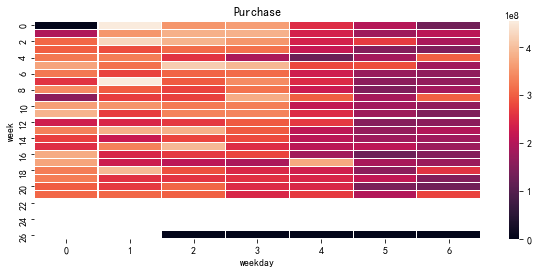

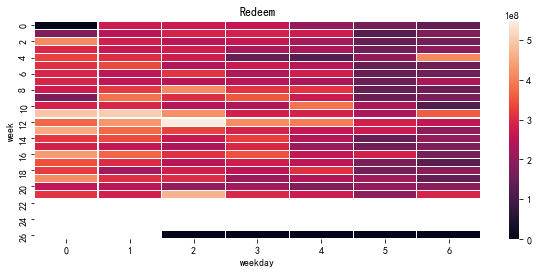

In [158]:
# 画出历史所有天的热力图
#2014-4-1开始到2014-8-1

test = np.zeros((max(total_balance_1['week']) - min(total_balance_1['week']) + 1, 7))
test[total_balance_1['week'] - min(total_balance_1['week']), total_balance_1['weekday']] = total_balance_1['total_purchase_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Purchase")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

test = np.zeros((max(total_balance_1['week']) - min(total_balance_1['week']) + 1, 7))
test[total_balance_1['week'] - min(total_balance_1['week']), total_balance_1['weekday']] = total_balance_1['total_redeem_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Redeem")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

In [159]:
# 对于热力图中异常点的数据分析.1


total_balance_1[(total_balance_1['week'] == 4 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 6)]

#五一 三天节日刚结束的第一天

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
307,2014-05-04,303087562.0,413222034.0,4,5,2014,18,6


In [160]:
# 对于热力图中异常点的数据分析.2

total_balance_1[(total_balance_1['week'] == 12 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 2)]

#2014-6-25 出台新政策

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
359,2014-06-25,264663201.0,547295931.0,25,6,2014,26,2


# 结论
16号——购买峰值（中秋节前）；28号——赎回峰值（国庆节前）;
11号和25号——赎回峰值（周三）;
19-21号（中秋节）；28-30号（国庆节）

# 分析节假日及特殊日期

### 清明节；端午节；劳动节；中秋节；618

In [161]:
# 获取节假日的数据

qingming = total_balance[(total_balance['date'] >= datetime.datetime(2014,4,5,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,4,8,0,0,0))]
labour = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,5,4,0,0,0))]
duanwu = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,31,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,6,3,0,0,0))]
data618 = total_balance[(total_balance['date'] >= datetime.datetime(2014,6,10,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,6,20,0,0,0))]

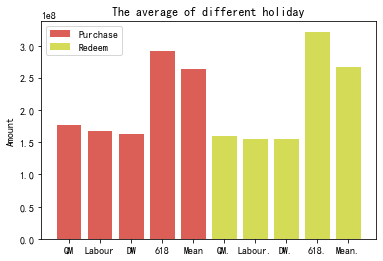

In [162]:

# 画出节假日与平时的均值

fig = plt.figure()
index_list = ['QM','Labour','DW','618','Mean']
label_list = [np.mean(qingming['total_purchase_amt']), np.mean(labour['total_purchase_amt']),np.mean(duanwu['total_purchase_amt']),np.mean(data618['total_purchase_amt']),np.mean(total_balance_1['total_purchase_amt'])]
plt.bar(index_list, label_list, label="Purchase")

index_list = ['QM.','Labour.','DW.','618.','Mean.']
label_list = [np.mean(qingming['total_redeem_amt']), np.mean(labour['total_redeem_amt']),np.mean(duanwu['total_redeem_amt']),np.mean(data618['total_redeem_amt']),np.mean(total_balance_1['total_redeem_amt'])]
plt.bar(index_list, label_list, label="Redeem")
plt.title("The average of different holiday")
plt.ylabel("Amount")
plt.legend()
plt.show()

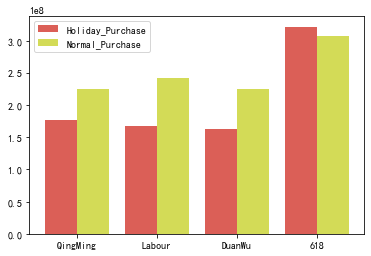

In [163]:
# 画出节假日购买量与其所处翌日的对比

import numpy as np
import matplotlib.pyplot as plt
size = 4
x = np.arange(size)

total_width, n = 0.8, 2    
width = total_width / n
x = x - (total_width - width) / 2

a = [176250006, 167825284, 162844282,321591063]
b = [225337516, 241859315, 225337516,307635449]

plt.bar(x, a,  width=width, label='Holiday_Purchase')
plt.bar(x + width, b, width=width, label='Normal_Purchase')
plt.xticks(x + width / 2, ('QingMing', 'Labour', 'DuanWu', '618'))
plt.legend()
plt.show()

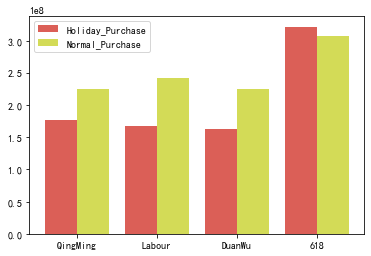

In [164]:
# 画出节假日购买量与其所处翌日的对比

import numpy as np
import matplotlib.pyplot as plt
size = 4
x = np.arange(size)

total_width, n = 0.8, 2    
width = total_width / n
x = x - (total_width - width) / 2

a = [176250006, 167825284, 162844282,321591063]
b = [225337516, 241859315, 225337516,307635449]

plt.bar(x, a,  width=width, label='Holiday_Purchase')
plt.bar(x + width, b, width=width, label='Normal_Purchase')
plt.xticks(x + width / 2, ('QingMing', 'Labour', 'DuanWu', '618'))
plt.legend()
plt.show()

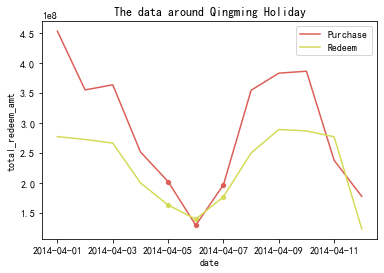

In [165]:
# 画出清明节与周边日期的时序图

qingming_around = total_balance[(total_balance['date'] >= datetime.datetime(2014,4,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,4,13,0,0,0))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=qingming_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=qingming_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=qingming, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=qingming, ax=ax)
plt.title("The data around Qingming Holiday")
ax.legend()


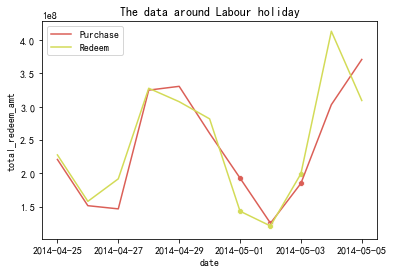

In [166]:

# 画出劳动节与周边日期的时序图

labour_around = total_balance[(total_balance['date'] >= datetime.datetime(2014,4,25,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,5,6,0,0,0))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=labour_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=labour_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=labour, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=labour, ax=ax)
plt.title("The data around Labour holiday")
ax.legend()

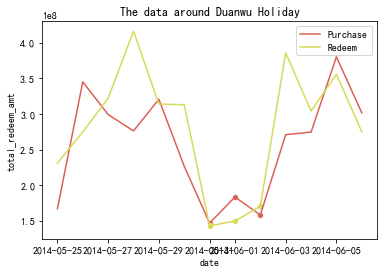

In [167]:

# # 画出端午节与周边日期的时序图

duanwu_around = total_balance[(total_balance['date'] >= datetime.datetime(2014,5,25,0,0,0)) & (total_balance['date'] < datetime.datetime(2014,6,7,0,0,0))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=duanwu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=duanwu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=duanwu, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=duanwu, ax=ax)
plt.title("The data around Duanwu Holiday")
ax.legend()

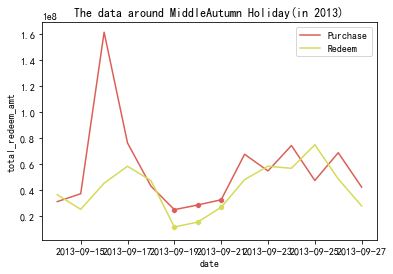

In [168]:
# 画出中秋与周边日期的时序图

zhongqiu = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,19,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,9,22,0,0,0))]
zhongqiu_around = total_balance[(total_balance['date'] >= datetime.datetime(2013,9,14,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,9,28,0,0,0))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=zhongqiu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=zhongqiu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=zhongqiu, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=zhongqiu, ax=ax)
plt.title("The data around MiddleAutumn Holiday(in 2013)")
ax.legend()

# 异常值分析

Text(0.5, 1.0, 'The abnormal value of total purchase')

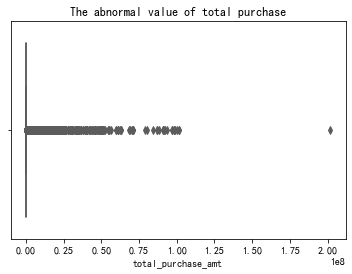

In [169]:
# 画出用户交易纪录的箱型图

sns.boxplot(data_balance['total_purchase_amt'])
plt.title("The abnormal value of total purchase")

In [170]:
#查找该用户为14592
data_balance.sort_values(by = 'total_redeem_amt',axis = 0,ascending = False).head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,category1,category2,category3,category4,date,day,month,year,week,weekday
1453311,14592,20131104,99457728,0,201768328,201768328,201275171,493157,102310600,0,...,NaN,NaN,NaN,NaN,2013-11-04,4,11,2013,45,0
1453388,14592,20140616,0,98964529,1966014,1953569,0,1953569,100930543,0,...,NaN,NaN,NaN,NaN,2014-06-16,16,6,2014,25,0
103654,3073,20140625,819080,101623646,11559,0,0,0,100816125,0,...,NaN,NaN,NaN,NaN,2014-06-25,25,6,2014,26,2
1511276,16191,20140318,0,99307284,1160217,1145600,0,1145600,100467501,0,...,NaN,NaN,NaN,NaN,2014-03-18,18,3,2014,12,1
1982316,2429,20140726,718955,99513169,1624726,1613561,0,1613561,100418940,0,...,NaN,NaN,NaN,NaN,2014-07-26,26,7,2014,30,5


In [171]:
# 对于购买2e8的用户的交易行为分析

data_balance[data_balance['user_id'] == 14592].sort_values(by = 'total_redeem_amt',axis = 0,ascending = False).head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,category1,category2,category3,category4,date,day,month,year,week,weekday
1453311,14592,20131104,99457728,0,201768328,201768328,201275171,493157,102310600,0,...,NaN,NaN,NaN,NaN,2013-11-04,4,11,2013,45,0
1453388,14592,20140616,0,98964529,1966014,1953569,0,1953569,100930543,0,...,NaN,NaN,NaN,NaN,2014-06-16,16,6,2014,25,0
1453227,14592,20131226,367063,98296082,17369,0,0,0,97946388,0,...,NaN,NaN,NaN,NaN,2013-12-26,26,12,2013,52,3
1453313,14592,20131105,97458675,99457728,4899446,4899446,4899446,0,6898499,0,...,NaN,NaN,NaN,NaN,2013-11-05,5,11,2013,45,1
1453355,14592,20140617,0,0,339679,339679,0,339679,339679,0,...,NaN,NaN,NaN,NaN,2014-06-17,17,6,2014,25,1


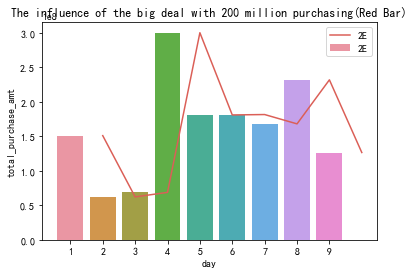

In [172]:
# 画出单笔交易为2e8的那天的总交易量及附近几天的交易量

e2 = total_balance[(total_balance['date'] >= datetime.datetime(2013,11,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,11,10,0,0,0))]
ax = sns.barplot(x="day", y="total_purchase_amt", data=e2, label='2E')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=e2, label='2E')
plt.title("The influence of the big deal with 200 million purchasing(Red Bar)")
ax.legend()

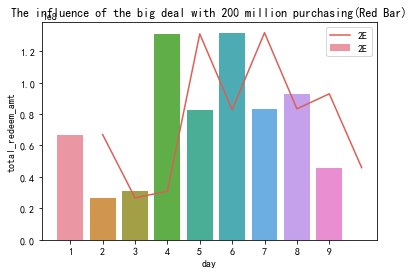

In [173]:
# 画出单笔交易为2e8的那天的总交易量及附近几天的交易量

e2 = total_balance[(total_balance['date'] >= datetime.datetime(2013,11,1,0,0,0)) & (total_balance['date'] < datetime.datetime(2013,11,10,0,0,0))]
ax = sns.barplot(x="day", y="total_redeem_amt", data=e2, label='2E')
ax = sns.lineplot(x="day", y="total_redeem_amt", data=e2, label='2E')
plt.title("The influence of the big deal with 200 million purchasing(Red Bar)")
ax.legend()

#用户的购买量高的时候，赎回量也高

Text(0.5, 1.0, 'The Biggest deal happend in each day')

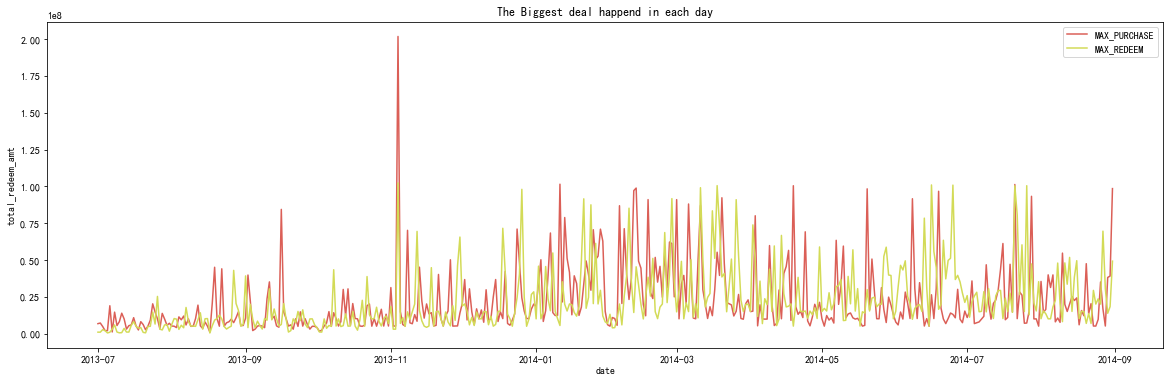

In [174]:

# 画出每日单笔最大交易的时序图

plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_REDEEM')
plt.title("The Biggest deal happend in each day")

Text(0.5, 1.0, 'The frequency of super big deal(larger than 100million) in each month')

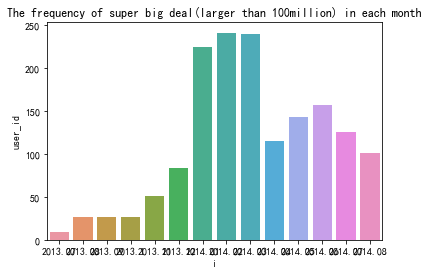

In [175]:
# 画出每个月大额交易的频次直方图

big_frequancy = data_balance[(data_balance['total_purchase_amt'] > 10000000) | (data_balance['total_redeem_amt'] > 10000000)][['month','year','user_id']].groupby(['year','month'], as_index=False).count()
big_frequancy['i'] = big_frequancy['year']  + big_frequancy['month'] / 100
ax = sns.barplot(x="i", y="user_id", data=big_frequancy)
plt.title("The frequency of super big deal(larger than 100million) in each month")

In [176]:
# 获取大额交易的数据集

data_balance['big_purchase'] = 0
data_balance.loc[data_balance['total_purchase_amt'] > 1000000, 'big_purchase'] = 1
data_balance['big_redeem'] = 0
data_balance.loc[data_balance['total_redeem_amt'] > 1000000, 'big_redeem'] = 1

In [177]:
# 对大额交易按每天做聚合操作

big_purchase = data_balance[data_balance['big_purchase'] == 1].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
small_purchase = data_balance[data_balance['big_purchase'] == 0].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
big_redeem = data_balance[data_balance['big_redeem'] == 1].groupby(['date'], as_index=False)['total_redeem_amt'].sum()
small_redeem = data_balance[data_balance['big_redeem'] == 0].groupby(['date'], as_index=False)['total_redeem_amt'].sum()

Text(0.5, 1.0, 'SMALL REDEEM')

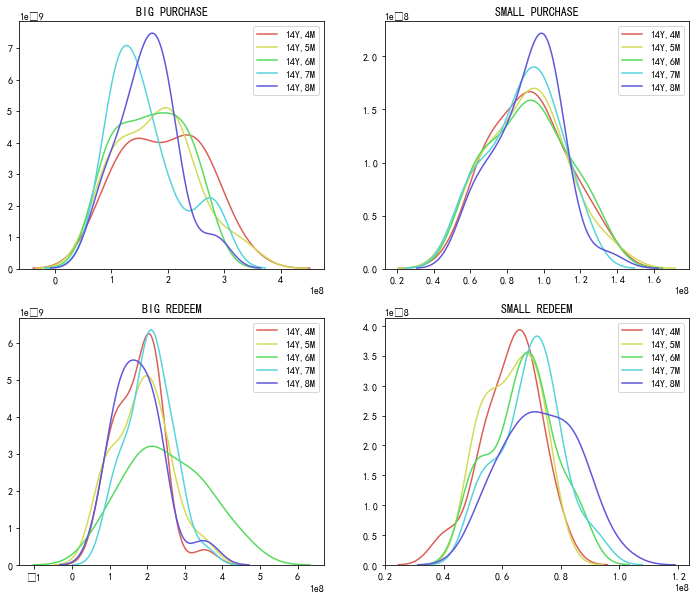

In [178]:
# 画出大额交易与小额交易的分布估计图

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for i in range(4, 9):
    sns.kdeplot(big_purchase[(big_purchase['date'] >= datetime.datetime(2014,i,1,0,0,0)) & (big_purchase['date'] < datetime.datetime(2014,i+1,1,0,0,0))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG PURCHASE')

plt.subplot(2,2,2)
for i in range(4, 9):
    sns.kdeplot(small_purchase[(small_purchase['date'] >= datetime.datetime(2014,i,1,0,0,0)) & (small_purchase['date'] < datetime.datetime(2014,i+1,1,0,0,0))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL PURCHASE')

plt.subplot(2,2,3)
for i in range(4, 9):
    sns.kdeplot(big_redeem[(big_redeem['date'] >= datetime.datetime(2014,i,1,0,0,0)) & (big_redeem['date'] < datetime.datetime(2014,i+1,1,0,0,0))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG REDEEM')

plt.subplot(2,2,4)
for i in range(4, 9):
    sns.kdeplot(small_redeem[(small_redeem['date'] >= datetime.datetime(2014,i,1,0,0,0)) & (small_redeem['date'] < datetime.datetime(2014,i+1,1,0,0,0))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL REDEEM')

In [179]:

# 添加时间戳

big_purchase['weekday'] = big_purchase['date'].dt.weekday
small_purchase['weekday'] = small_purchase['date'].dt.weekday
big_redeem['weekday'] = big_redeem['date'].dt.weekday
small_redeem['weekday'] = small_redeem['date'].dt.weekday

Text(0.5, 1.0, 'SMALL REDEEM')

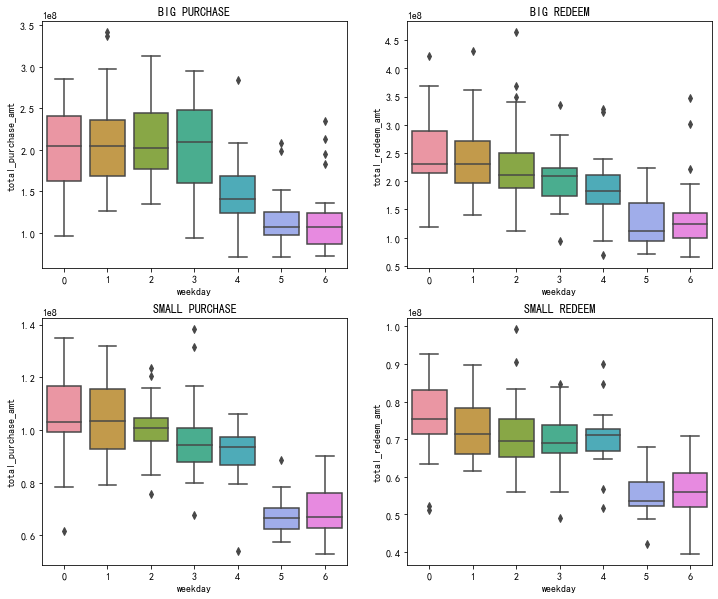

In [180]:
# 分析大额小额的翌日分布

plt.figure(figsize=(12, 10))

ax = plt.subplot(2,2,1)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=big_purchase[big_purchase['date'] >= datetime.datetime(2014,4,1,0,0,0)])
plt.title('BIG PURCHASE')

ax = plt.subplot(2,2,2)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=big_redeem[big_redeem['date'] >= datetime.datetime(2014,4,1,0,0,0)])
plt.title('BIG REDEEM')

ax = plt.subplot(2,2,3)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=small_purchase[small_purchase['date'] >= datetime.datetime(2014,4,1,0,0,0)])
plt.title('SMALL PURCHASE')

ax = plt.subplot(2,2,4)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=small_redeem[small_redeem['date'] >= datetime.datetime(2014,4,1,0,0,0)])
plt.title('SMALL REDEEM')

# 分析其他变量

In [181]:

# 截断数据集

data_balance_1 = data_balance[data_balance['date'] > datetime.datetime(2014,4,1)]

Text(0.5, 1, 'The coleration between each feature in User_Balance_Table')

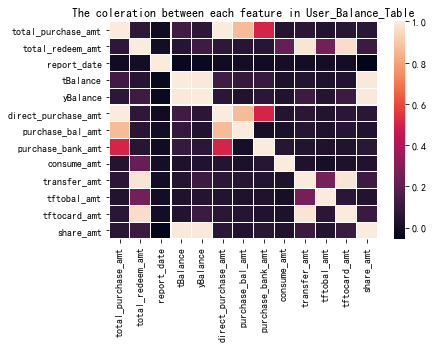

In [182]:
# 画出用户交易纪录表中其他变量与标签的相关性图

feature = ['total_purchase_amt','total_redeem_amt', 'report_date', 'tBalance', 'yBalance', 
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
        'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt']

sns.heatmap(data_balance_1[feature].corr(), linewidths = 0.05)   
plt.title("The coleration between each feature in User_Balance_Table")

# 对于银行及支付宝利率的分析

In [183]:
# 读取银行利率并添加时间戳
bank = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\mfd_bank_shibor.csv")
bank = bank.rename(columns = {'mfd_date': 'date'})
bank_features = [x for x in bank.columns if x not in ['date']]#去除和时间有关的特征，留下其他特征
bank['date'] = pd.to_datetime(bank['date'], format= "%Y%m%d")
bank['day'] = bank['date'].dt.day
bank['month'] = bank['date'].dt.month
bank['year'] = bank['date'].dt.year
bank['week'] = bank['date'].dt.week
bank['weekday'] = bank['date'].dt.weekday

In [184]:
# 读取支付宝利率并添加时间戳
share = pd.read_csv("C:\\Users\\11512\\Desktop\\datawhale\\Purchase Redemption Data\\mfd_day_share_interest.csv")

share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

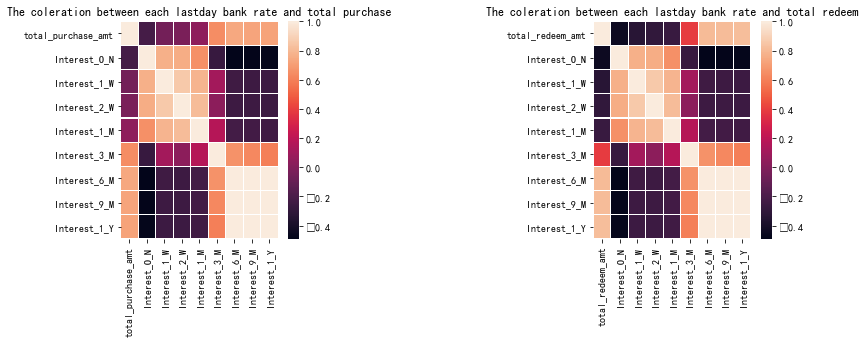

In [185]:
# 画出上一天银行及支付宝利率与标签的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each lastday bank rate and total purchase")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each lastday bank rate and total redeem")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)

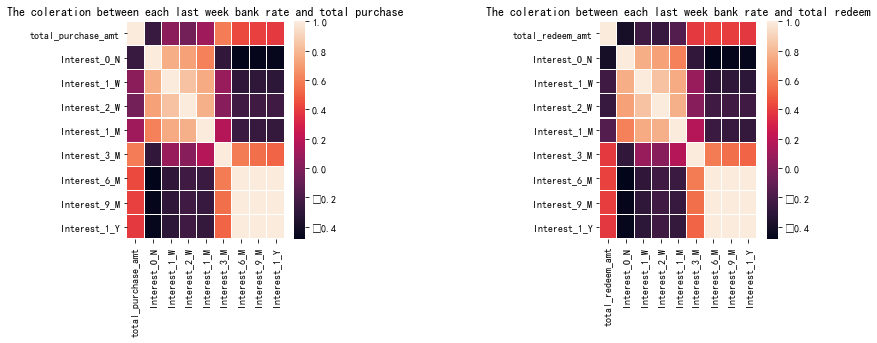

In [186]:
# 画出上一星期银行及支付宝利率与标签的相关性图

bank['last_week'] = bank['week'] + 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each last week bank rate and total purchase")
temp = pd.merge(bank[['last_week','weekday']+bank_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each last week bank rate and total redeem")
temp = pd.merge(bank[['last_week','weekday']+bank_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)

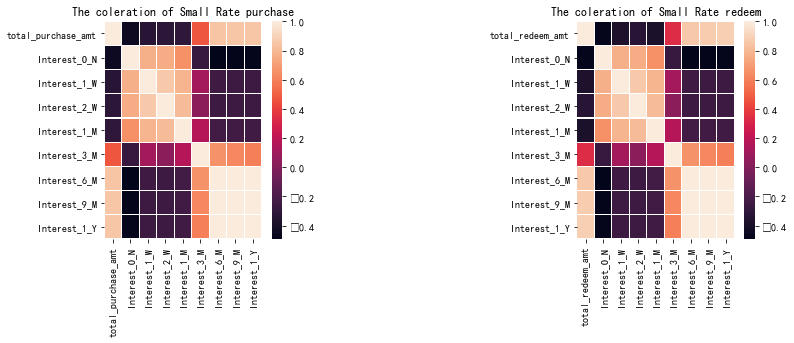

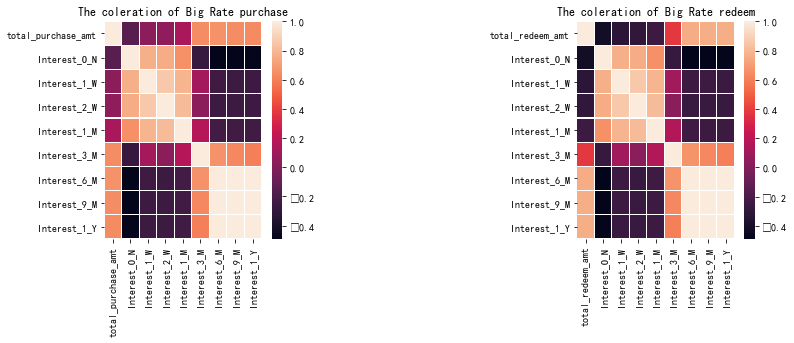

In [187]:
# 分别画出上一星期银行及支付宝利率与大额小额数据的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration of Small Rate purchase")
temp = pd.merge(bank[['last_date']+bank_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration of Small Rate redeem")
temp = pd.merge(bank[['last_date']+bank_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration of Big Rate purchase")
temp = pd.merge(bank[['last_date']+bank_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration of Big Rate redeem")
temp = pd.merge(bank[['last_date']+bank_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)

Text(0, 0.5, 'Rate')

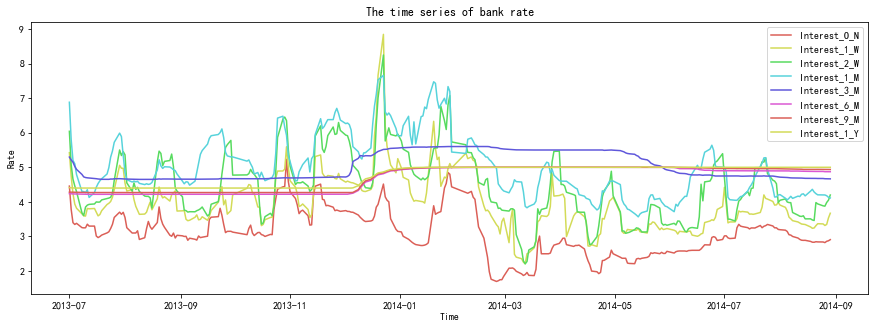

In [188]:

# 画出银行利率的时序图

plt.figure(figsize=(15,5))
for i in bank_features:
    plt.plot(bank['date'], bank[[i]] ,label=i)
plt.legend()
plt.title("The time series of bank rate")
plt.xlabel("Time")
plt.ylabel("Rate")

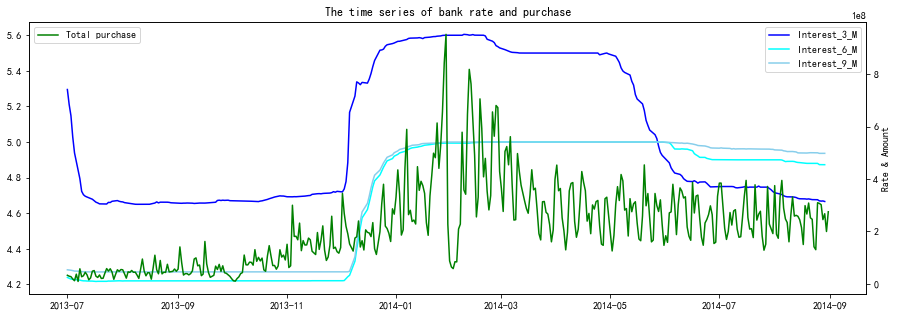

In [189]:
# 画出部分银行利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'skyblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")

plt.legend(loc=2)
plt.title("The time series of bank rate and purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")
plt.show()

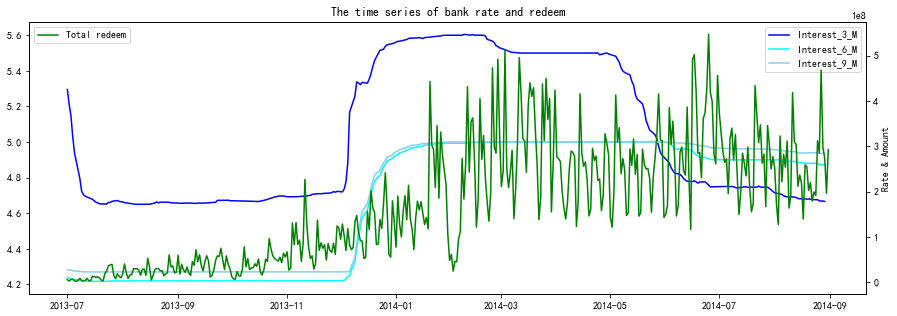

In [190]:
# 画出部分银行利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'skyblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")

plt.legend(loc=2)
plt.title("The time series of bank rate and redeem")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

# share 数组探索性分析

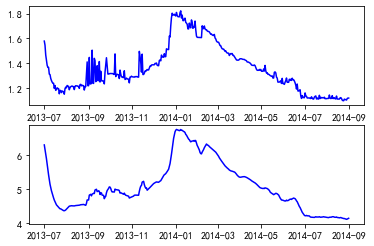

In [191]:

import seaborn as sns 
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间

f=plt.figure()

f.add_subplot(2,1,1)

plt.plot(share["date"],share["mfd_daily_yield"],"b",label="每日收益")


#plt.title("每日收益",fontsize=14)

f.add_subplot(2,1,2)

plt.plot(share["date"],share["mfd_7daily_yield"],"b",label="七日收益")


plt.show()


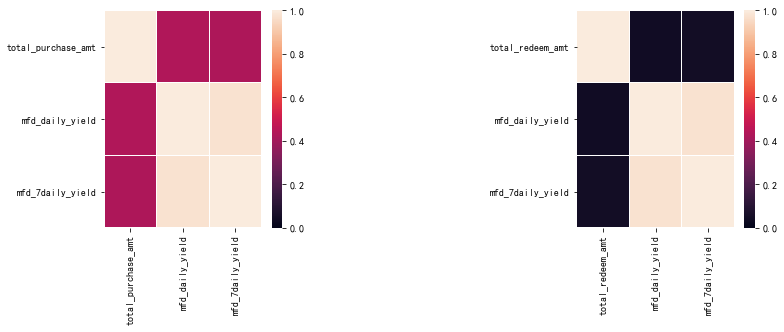

In [192]:
# 画出上一天支付宝利率与购买量/赎回量的相关性图 

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)

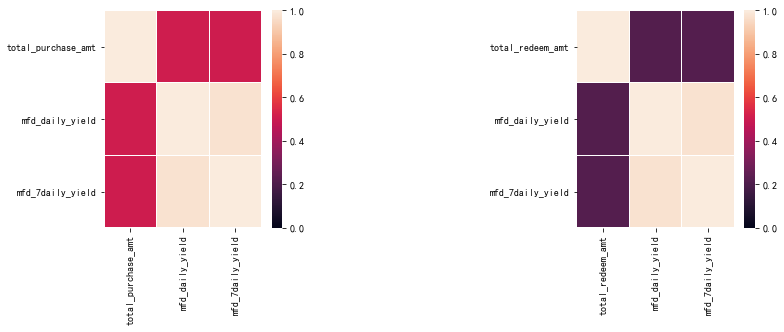

In [193]:

# 画出银行利率与标签的相关性图

share['last_week'] = share['week'] + 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)

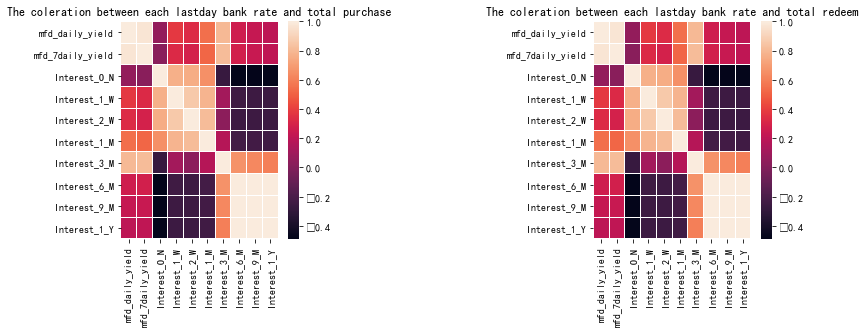

In [194]:
# 画出上一天银行及支付宝利率与标签的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each lastday bank rate and total purchase")
temp = pd.merge(bank[['last_date']+bank_features], share, left_on='last_date', right_on='date')[share_features+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each lastday bank rate and total redeem")
temp = pd.merge(bank[['last_date']+bank_features], share, left_on='last_date', right_on='date')[share_features+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)

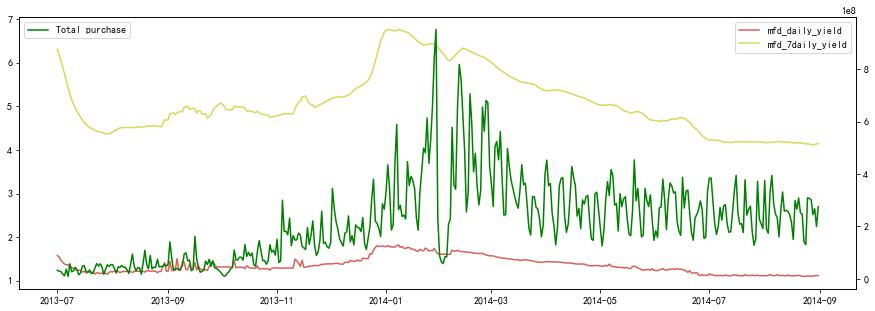

In [195]:
# 画出支付宝利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],label=i)

plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")
plt.legend(loc=2)
plt.show()

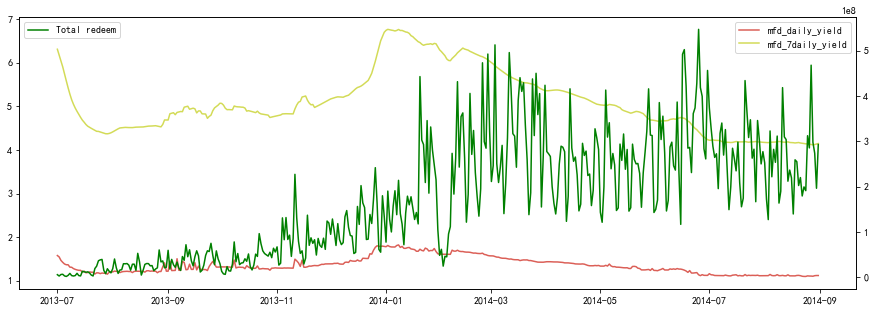

In [196]:

# 画出支付宝利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],label=i)

plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")
plt.legend(loc=2)
plt.show()

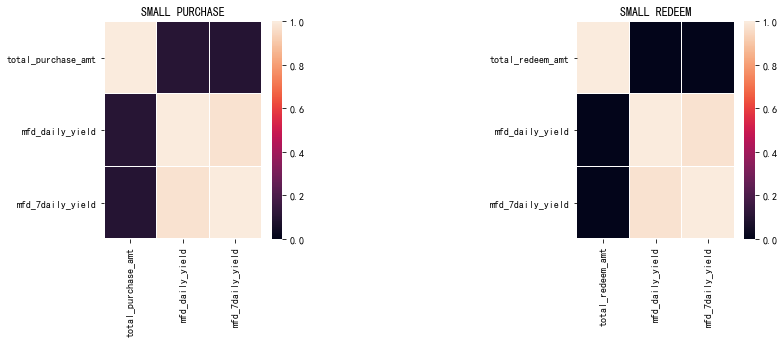

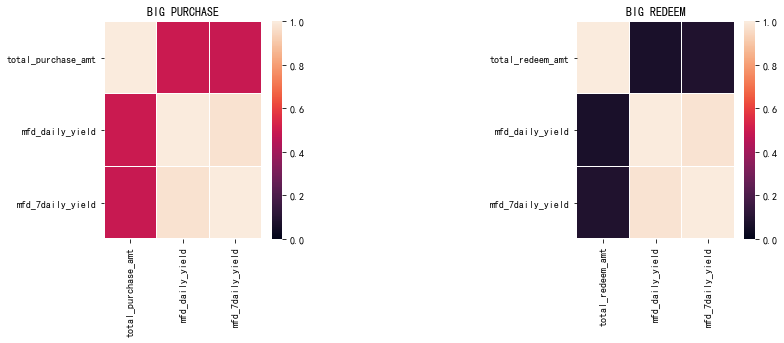

In [197]:
# 画出大额小额数据与支付宝利率的相关性图

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  
plt.title("SMALL PURCHASE")
plt.subplot(1,3,3)
plt.title("SMALL REDEEM")
temp = pd.merge(share[['last_date']+share_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("BIG PURCHASE")
temp = pd.merge(share[['last_date']+share_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  
plt.subplot(1,3,3)
plt.title("BIG REDEEM")
temp = pd.merge(share[['last_date']+share_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)

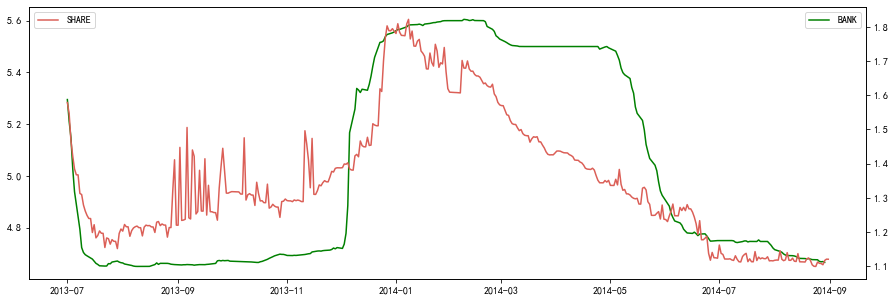

In [198]:
# 画出银行利率与支付宝利率的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],c='g',label= 'BANK')

plt.legend()
ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],label='SHARE')
plt.legend(loc=2)
plt.show()

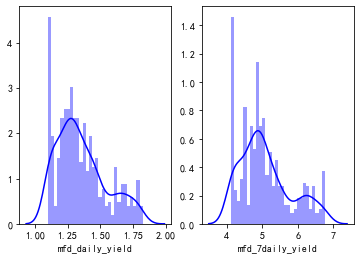

In [199]:
import seaborn as sns 
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间

f=plt.figure()

f.add_subplot(1,2,1)

sns.distplot(share["mfd_daily_yield"],color="b",bins=30,kde=True)

f.add_subplot(1,2,2)

sns.distplot(share["mfd_7daily_yield"],color="b",bins=30,kde=True)

plt.show()


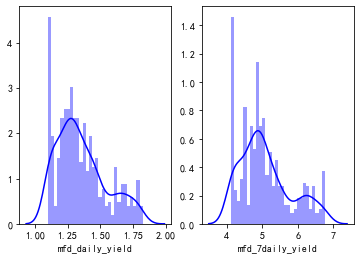

In [200]:
f=plt.figure()

f.add_subplot(1,2,1)

sns.distplot(share["mfd_daily_yield"],color="b",bins=30,kde=True)

f.add_subplot(1,2,2)

sns.distplot(share["mfd_7daily_yield"],color="b",bins=30,kde=True)

plt.show()


([], <a list of 0 Text xticklabel objects>)

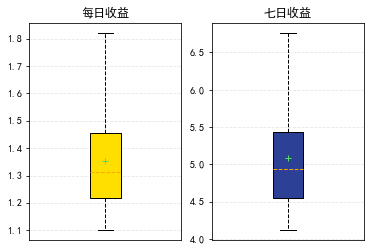

In [201]:
## 每日收益（图一）##
plt.subplot(1,2,1)      #将四个箱线图画在一行中
Box1=share["mfd_daily_yield"]    #提取文件中AQI的数据
plt.grid(linestyle="--", alpha=0.3)    #绘制图像底部虚线.   (linestyle=ls,  markerfacecolor=mfc)
plt.boxplot(
            Box1,       
            patch_artist=True,         
            showmeans=True,    #显示均值点
            whis=8,   
            widths=0.2,      #箱体宽度
            boxprops={'color': 'black', 'facecolor': '#FFDF00'},   #设置箱体属性
            flierprops={'marker': 'o', 'mfc': 'red', 'color': 'black'},    #设置异常值属性
            meanprops={'marker': '+', 'mfc': 'black'},      #设置均值点属性
            medianprops={'ls': '--', 'color': 'orange'},      #设置中位数属性
            whiskerprops={'ls': '--', 'mfc': 'red', 'color': 'black'},  #设置触须属性
                   )

plt.title('每日收益')    #子标题
plt.xticks([])    #关闭x轴坐标显示


## 七日收益（图二）##
plt.subplot(1,2,2)
Box2=share["mfd_7daily_yield"]
plt.grid(linestyle="--", alpha=0.3)
plt.boxplot( 
            Box2,
            patch_artist=True,
            showmeans=True,
            whis=8,
            widths=0.2,
            boxprops={'color': 'black', 'facecolor': '#2C4096'},
            flierprops={'marker': 'o', 'mfc': 'red', 'color': 'black'},
            meanprops={'marker': '+', 'mfc': 'black'},
            medianprops={'ls': '--', 'color': 'orange'},
            whiskerprops={'ls': '--', 'mfc': 'red', 'color': 'black'}
            )
plt.title('七日收益')
plt.xticks([])

In [202]:
from mvtpy.mvtest import mvtest
sample = mvtest()
y = share["mfd_7daily_yield"]
x = share["mfd_daily_yield"]
# Y has to be a discrete vector
sample.test(x, y)

##p=0.01,拒绝原假设，两者不独立

{'Tn': 37.88, 'p-value': [0, 0.01]}